In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [16]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [20]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


/var/folders/kb/_d2v6l3d3bbbwbj89tc22rg00000gn/T/ipykernel_56851/2390360803.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='placed', data=df, palette='Set2')


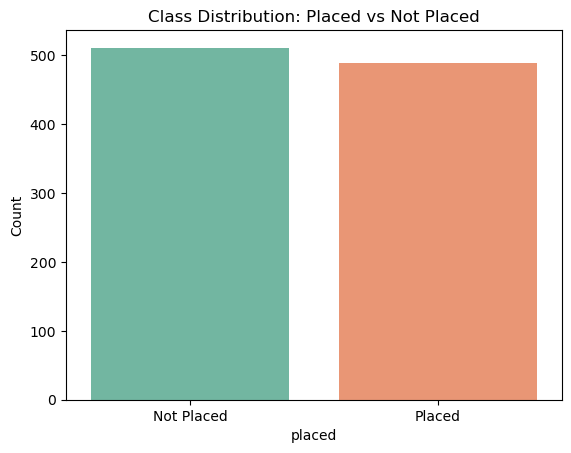

In [28]:
sns.countplot(x='placed', data=df, palette='Set2')
plt.title('Class Distribution: Placed vs Not Placed')
plt.xticks([0,1], ['Not Placed', 'Placed'])
plt.ylabel('Count')
plt.show()

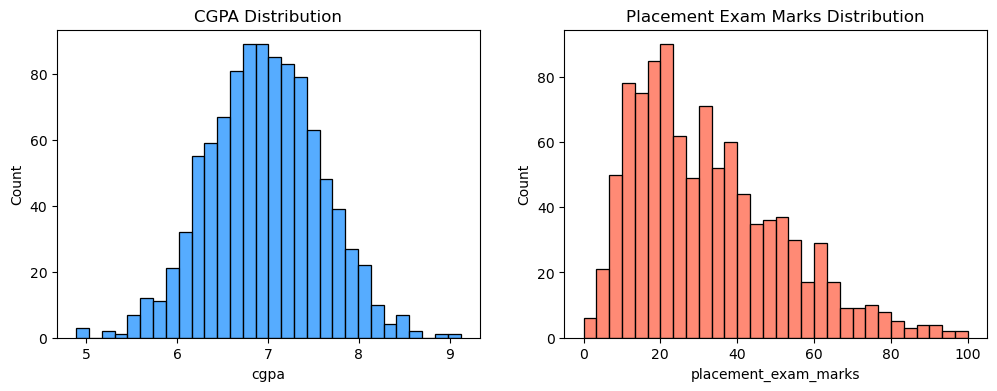

In [30]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
sns.histplot(df['cgpa'], bins=30, color='dodgerblue', ax=ax[0])
ax[0].set_title('CGPA Distribution')
sns.histplot(df['placement_exam_marks'], bins=30, color='tomato', ax=ax[1])
ax[1].set_title('Placement Exam Marks Distribution')
plt.show()

/var/folders/kb/_d2v6l3d3bbbwbj89tc22rg00000gn/T/ipykernel_56851/3403858446.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='placed', y='cgpa', data=df, ax=ax[0], palette='Pastel1')
/var/folders/kb/_d2v6l3d3bbbwbj89tc22rg00000gn/T/ipykernel_56851/3403858446.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['Not Placed', 'Placed'])
/var/folders/kb/_d2v6l3d3bbbwbj89tc22rg00000gn/T/ipykernel_56851/3403858446.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='placed', y='placement_exam_marks', data=df, ax=ax[1], palette='Pastel2')
/var/folders/kb/_d2v6l3d3bbbwbj89tc22rg00000gn

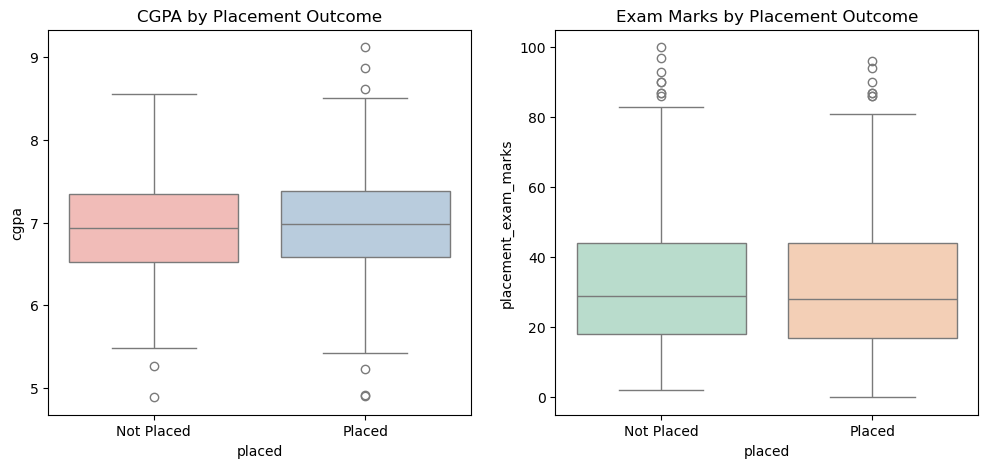

In [34]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.boxplot(x='placed', y='cgpa', data=df, ax=ax[0], palette='Pastel1')
ax[0].set_title('CGPA by Placement Outcome')
ax[0].set_xticklabels(['Not Placed', 'Placed'])

sns.boxplot(x='placed', y='placement_exam_marks', data=df, ax=ax[1], palette='Pastel2')
ax[1].set_title('Exam Marks by Placement Outcome')
ax[1].set_xticklabels(['Not Placed', 'Placed'])
plt.show()

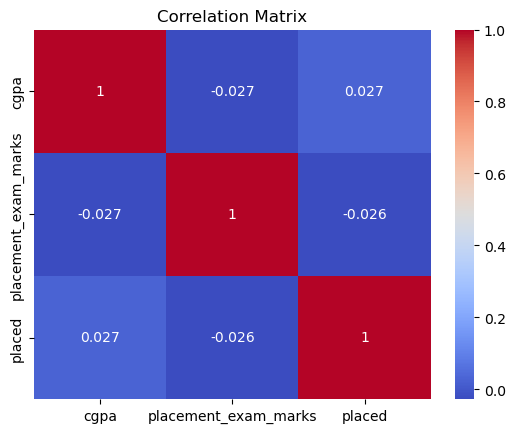

In [36]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Logistic Regression

In [46]:
x = df[['cgpa','placement_exam_marks']]
y = df[['placed']]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 10)
x_train.shape , x_test.shape

((800, 2), (200, 2))

In [52]:
model = LogisticRegression()
model.fit(x_train,y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [74]:
y_pred = model.predict(x_test)

print(' ----- Classification report ----- ')
print(classification_report(y_test, y_pred))
print(' ----- Confusion matrix ----- ')
print(confusion_matrix(y_test, y_pred))
print(' ----- Accuracy score ----- ')
print(accuracy_score(y_test, y_pred))

 ----- Classification report ----- 
              precision    recall  f1-score   support

           0       0.51      0.77      0.61       102
           1       0.49      0.22      0.31        98

    accuracy                           0.51       200
   macro avg       0.50      0.50      0.46       200
weighted avg       0.50      0.51      0.46       200

 ----- Confusion matrix ----- 
[[79 23]
 [76 22]]
 ----- Accuracy score ----- 
0.505


# Decision Tree